<a href="https://colab.research.google.com/github/ofgkts/my_trainings/blob/main/torch_trains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
random_tensor=torch.rand(size=(7,7))
random_tensor

tensor([[0.8226, 0.0838, 0.6821, 0.5922, 0.8008, 0.1934, 0.7495],
        [0.7602, 0.0712, 0.8740, 0.0801, 0.9899, 0.1267, 0.0543],
        [0.3035, 0.1346, 0.7660, 0.0789, 0.5554, 0.8411, 0.5745],
        [0.8179, 0.9115, 0.5775, 0.8055, 0.4092, 0.2366, 0.3783],
        [0.5714, 0.4473, 0.1040, 0.7757, 0.5475, 0.3892, 0.2096],
        [0.4876, 0.6726, 0.2791, 0.3379, 0.5935, 0.2927, 0.9098],
        [0.4435, 0.1269, 0.0115, 0.6916, 0.0665, 0.4726, 0.2274]])

In [ ]:
random_tensor1=torch.rand(size=(1,7))
random_tensor2=torch.rand(size=(1,7))
a=torch.matmul(random_tensor1,random_tensor2.T)
a

tensor([[1.6189]])

In [ ]:
#set manual seed
torch.manual_seed(0)
random_tensor2=torch.rand(size=(7,7))
random_tensor3=torch.rand(size=(1,7))
a=torch.matmul(random_tensor2,random_tensor3.T)
a,a.shape

(tensor([[1.8542],
         [1.9611],
         [2.2884],
         [3.0481],
         [1.7067],
         [2.5290],
         [1.7989]]),
 torch.Size([7, 1]))

In [ ]:
!nvidia-smi

Thu Jul  6 10:34:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
torch.cuda.manual_seed(1234)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")
tensor_a=torch.rand(size=(2,3)).to(device)
tensor_b=torch.rand(size=(2,3)).to(device)

Device: cuda


In [ ]:
matmuls=torch.matmul(tensor_a,tensor_b.T)
matmuls,matmuls.shape

(tensor([[0.6120, 0.3389],
         [0.6880, 0.7449]], device='cuda:0'),
 torch.Size([2, 2]))

In [ ]:
torch.max(matmuls), torch.min(matmuls)

(tensor(0.7449, device='cuda:0'), tensor(0.3389, device='cuda:0'))

In [ ]:
torch.argmax(matmuls),torch.argmin(matmuls)

(tensor(3, device='cuda:0'), tensor(1, device='cuda:0'))

In [ ]:

# Set seed
torch.cuda.manual_seed(7)
# Create random tensor
tensor_a=torch.rand(size=(1,1,1,10 )).to(device)
tensor_b=torch.rand(size=(1,1,1,10)).to(device)
# Remove single dimension
tensor_a=torch.squeeze(tensor_a)
tensor_b=torch.squeeze(tensor_b)

# Print out tensors and their shapestorch.cuda.manual_seed(7)
print(tensor_a, tensor_a.shape)
print(tensor_b, tensor_b.shape)


tensor([0.1323, 0.4582, 0.7217, 0.1514, 0.7032, 0.7999, 0.6302, 0.8611, 0.1137,
        0.6662], device='cuda:0') torch.Size([10])
tensor([0.1463, 0.6997, 0.2784, 0.3470, 0.2554, 0.2264, 0.4147, 0.6608, 0.6798,
        0.6487], device='cuda:0') torch.Size([10])


In [ ]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt


# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
# Create the data parameters
weight=0.3
bias=0.9
# Make X and y using linear regression feature
X=torch.arange(0,1,0.01).unsqueeze(dim = 1)
y=weight * X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")


Using device: cuda
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


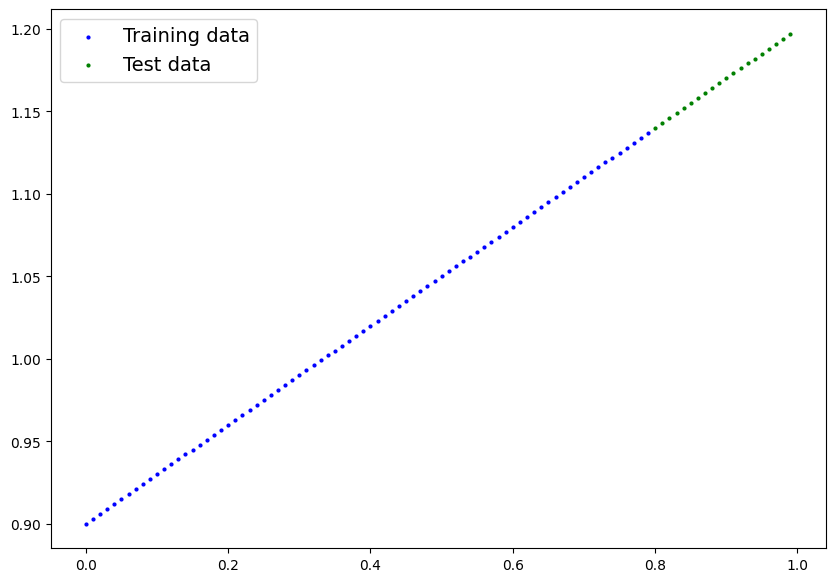

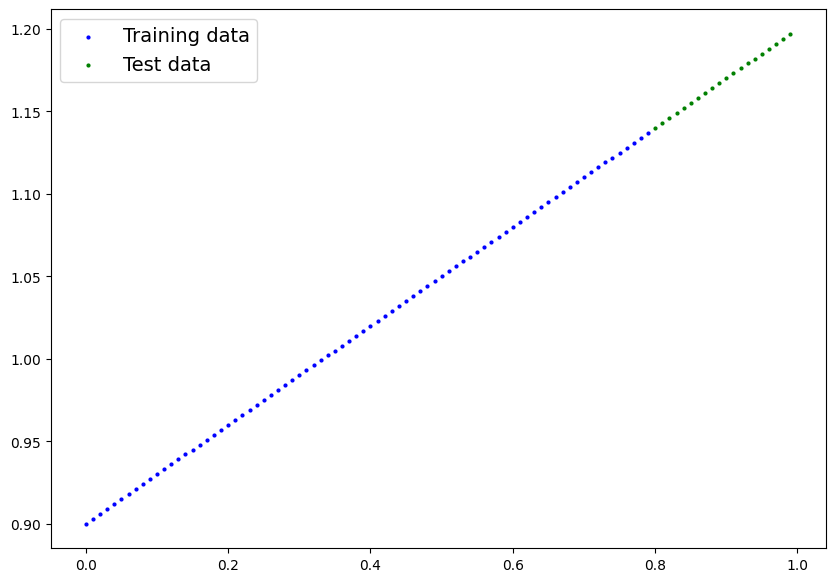

In [ ]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
# Plot the training and testing data
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels,c = 'b',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'g',s = 4,label = "Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend(prop = {"size" : 14})
plot_predictions()

plot_predictions();

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


model_0=LinearRegressionModel()
model_0.to(device)
model_0.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
# Training loop
# Train model for 300 epochs
torch.manual_seed(42)

epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred,y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:
    # Put model in evaluation mode and setup inference context
    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = model_0(X_test).float()
      # 2. Calculate test loss
      test_loss = loss_fn(y_preds,y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 0.128 | Test loss: 0.337
Epoch: 20 | Train loss: 0.082 | Test loss: 0.218
Epoch: 40 | Train loss: 0.072 | Test loss: 0.175
Epoch: 60 | Train loss: 0.065 | Test loss: 0.153
Epoch: 80 | Train loss: 0.058 | Test loss: 0.137
Epoch: 100 | Train loss: 0.051 | Test loss: 0.121
Epoch: 120 | Train loss: 0.045 | Test loss: 0.104
Epoch: 140 | Train loss: 0.038 | Test loss: 0.088
Epoch: 160 | Train loss: 0.031 | Test loss: 0.072
Epoch: 180 | Train loss: 0.024 | Test loss: 0.056
Epoch: 200 | Train loss: 0.017 | Test loss: 0.040
Epoch: 220 | Train loss: 0.010 | Test loss: 0.024
Epoch: 240 | Train loss: 0.003 | Test loss: 0.007
Epoch: 260 | Train loss: 0.008 | Test loss: 0.007
Epoch: 280 | Train loss: 0.008 | Test loss: 0.007


In [ ]:

# Make predictions with the model
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]], device='cuda:0')

TypeError: ignored

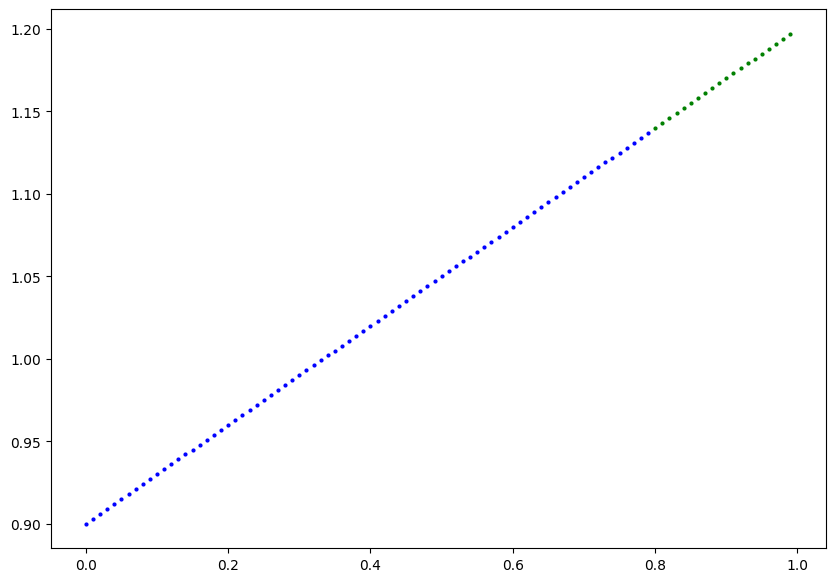

In [ ]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_pred)

In [ ]:

from pathlib import Path
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:

# Create new instance of model and load saved state dict (make sure to put it on the target device)
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.to(device)
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model
# Make predictions with loaded model and compare them to the previous
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')